In [2]:
import pennylane as qml
from pennylane import numpy as pnp
import numpy as np
from susy_qm import calculate_Hamiltonian
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cutoff = 16
potential = 'DW'

In [3]:
# Calculate Hamiltonian and expected eigenvalues
H = calculate_Hamiltonian(cutoff, potential)
eigenvalues, eigenvectors = np.linalg.eig(H)
min_3_ev = eigenvalues.argsort()[:4]
min_eigenvector = np.asarray(eigenvectors[:, min_3_ev[0]])

num_qubits = int(1 + np.log2(cutoff))

In [68]:
dev = qml.device("default.qubit", wires=num_qubits, shots=16, seed=29196039)
@qml.qnode(dev)
def circuit(params):
    
    param_index=0
    for i in range(num_qubits):
        qml.RY(params[param_index], wires=i)
        param_index += 1

    for j in reversed(range(1, num_qubits)):
        qml.CNOT(wires=[j, j-1])

    for k in range(num_qubits):
        qml.RY(params[param_index], wires=k)
        param_index += 1
        
    return qml.expval(qml.Hermitian(H, wires=range(num_qubits)))

In [40]:
params = [
            1.6651000835501377,
            1.5443505436144205,
            4.668037574692946,
            5.472710617113478,
            3.5819107164810235,
            4.644276312292549,
            4.624915603340787,
            1.4879165582986136,
            4.159980590163201,
            2.1796677721828264
        ]

In [69]:
lowest = np.inf
energies = []
for i in range(10000):
    params = np.random.rand(2*num_qubits)*2*np.pi
    e = circuit(params)
    energies.append(e)
    if e < lowest:
        lowest = e
        print(i, lowest)

0 51.11147773104278
1 48.74824588807723
3 34.90682028356648
4 18.73300647045726
10 16.589110065923187
17 2.93322748137832
2704 1.121918017960483


In [ ]:
shots_list = [2, 4, 8, 32, 128, 512, 1024, 2048, 4096, 10000]
all_energies = []
for shots in shots_list:

    print(f"running for shots: {shots}")

    dev = qml.device("default.qubit", wires=num_qubits, shots=shots, seed=42)
    @qml.qnode(dev)
    def circuit(params):
        
        param_index=0
        for i in range(num_qubits):
            qml.RY(params[param_index], wires=i)
            param_index += 1

        for j in reversed(range(1, num_qubits)):
            qml.CNOT(wires=[j, j-1])

        for k in range(num_qubits):
            qml.RY(params[param_index], wires=k)
            param_index += 1
            
        return qml.expval(qml.Hermitian(H, wires=range(num_qubits)))
    
    lowest = np.inf
    energies = []
    for i in range(10000):

        if i % 1000 == 0:
            print(f"circuit eval: {i}")

        params = np.random.rand(2*num_qubits)*2*np.pi
        e = circuit(params)
        energies.append(e)

    all_energies.append(energies)

    plt.figure()
    sns.histplot(energies, kde=True)
    plt.axvline(x=0.89159936, color='red', linestyle='--', linewidth=1.0)
    plt.savefig(r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\PennyLane\EnergyDistributions\Histograms\Histo_{}.png".format(str(shots)))

plt.figure()
for i, e in enumerate(all_energies):

    sns.kdeplot(e, label=f"{shots_list[i]}")

plt.legend()
plt.xlabel("Energy")
plt.ylabel("Density")
plt.title("KDEs of Multiple Energy Distributions")
plt.savefig(r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\PennyLane\EnergyDistributions\Histograms\probs.png")


In [22]:
np.mean(e)

np.float64(69.4904399665205)

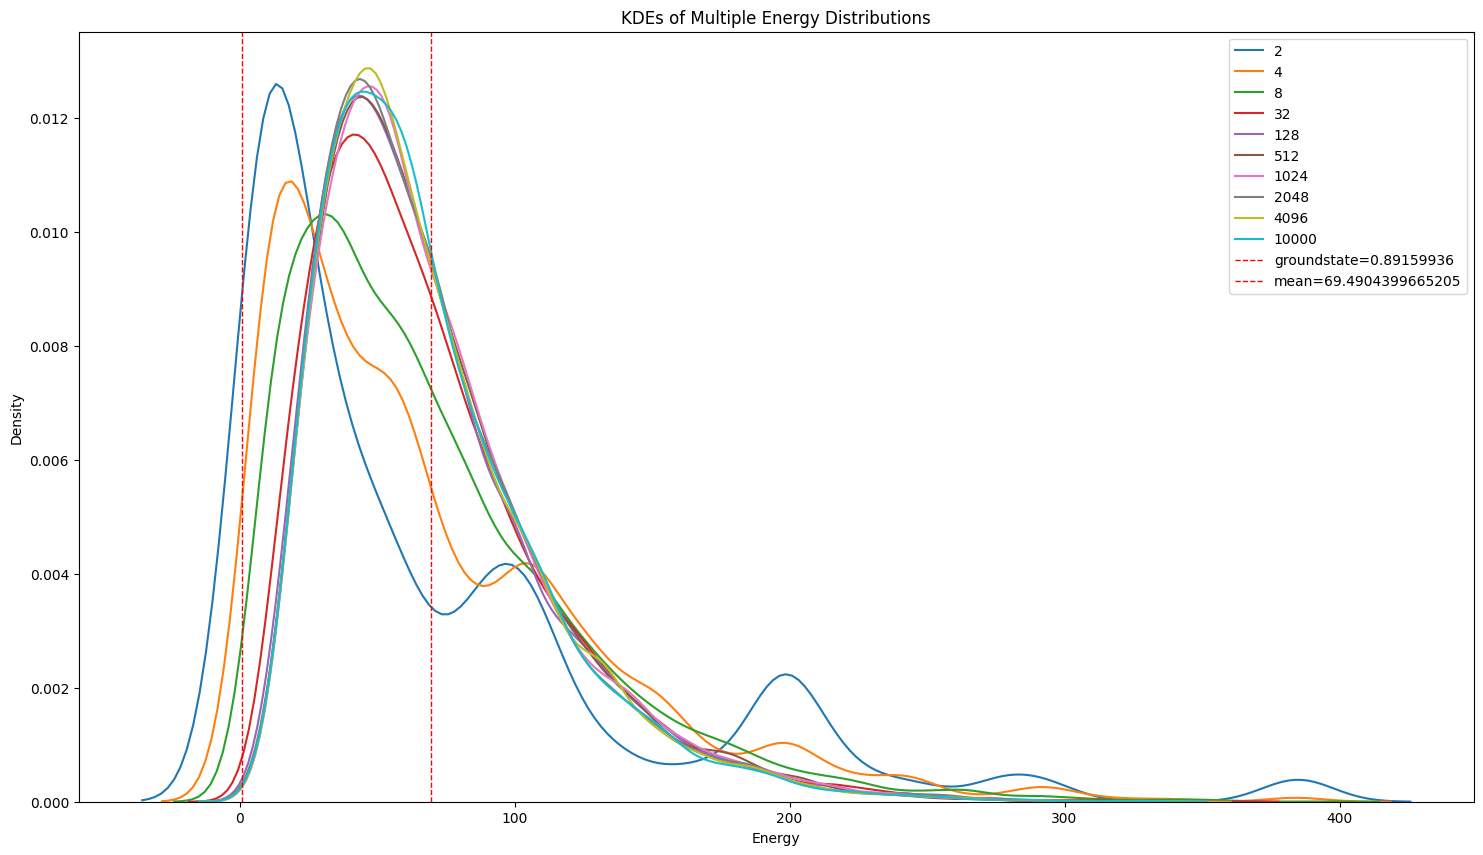

In [25]:
plt.figure(figsize=(18,10))
for i, e in enumerate(all_energies):

    sns.kdeplot(e, label=f"{shots_list[i]}")

mean = np.mean(e)
plt.axvline(x=0.89159936, color='red', linestyle='--', linewidth=1.0, label='groundstate=0.89159936')
plt.axvline(x=mean, color='red', linestyle='--', linewidth=1.0, label=f'mean={mean}')
plt.legend()
plt.xlabel("Energy")
plt.ylabel("Density")
plt.title("KDEs of Multiple Energy Distributions")
plt.show()

In [ ]:
shots_list = [2, 4, 8, 32, 128, 512, 1024, 2048, 4096, 10000]
all_energies = []


params = [
            1.6030557743624225,
            4.708882032084252,
            1.5927116455932047,
            0.7453696011323698,
            2.7112379205665893,
            4.721932631793341,
            1.5783945888241828,
            1.4632540703530639,
            4.043882986825778,
            2.1520442158563426
        ]

for shots in shots_list:

    print(f"running for shots: {shots}")

    dev = qml.device("default.qubit", wires=num_qubits, shots=shots, seed=1088653)
    @qml.qnode(dev)
    def circuit(params):
        
        param_index=0
        for i in range(num_qubits):
            qml.RY(params[param_index], wires=i)
            param_index += 1

        for j in reversed(range(1, num_qubits)):
            qml.CNOT(wires=[j, j-1])

        for k in range(num_qubits):
            qml.RY(params[param_index], wires=k)
            param_index += 1
            
        return qml.expval(qml.Hermitian(H, wires=range(num_qubits)))
    
    lowest = np.inf
    energies = []
    for i in range(10000):

        if i % 1000 == 0:
            print(f"circuit eval: {i}")

        e = circuit(params)
        energies.append(e)

    all_energies.append(energies)

    plt.figure()
    sns.histplot(energies, kde=False)
    plt.xlabel("Energy")
    plt.title(f"Energy distribution: shots = {shots}")
    plt.axvline(x=0.89159936, color='red', linestyle='--', linewidth=1.0)
    plt.savefig(r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\PennyLane\EnergyDistributions\HistogramsDEParams\Histo_{}.png".format(str(shots)))

plt.figure()
for i, e in enumerate(all_energies):

    sns.kdeplot(e, label=f"{shots_list[i]}")

plt.legend()
plt.xlabel("Energy")
plt.ylabel("Density")
plt.title("KDEs of Multiple Energy Distributions")
plt.savefig(r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\PennyLane\EnergyDistributions\HistogramsDEParams\probs.png")


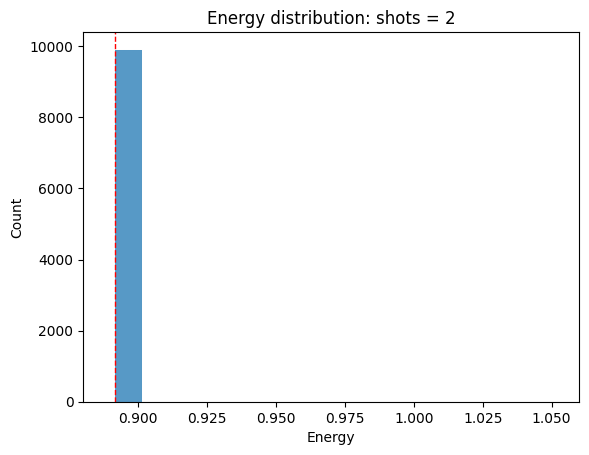

In [56]:
plt.figure()
sns.histplot(all_energies[0], kde=False, bins=10000)  # increase bins for resolution
plt.xlabel("Energy")
plt.title(f"Energy distribution: shots = {2}")
plt.axvline(x=0.89159936, color='red', linestyle='--', linewidth=1.0)
plt.xlim(0.88, 1.06)  # <- manually set range around the ground state
plt.show()


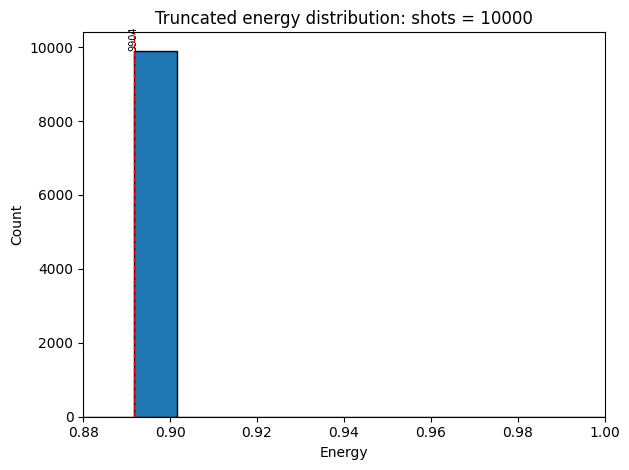

In [55]:

# Your histogram data
data = all_energies[0]
bin_range = (0.88, 1.0)

# Truncate data
data = [e for e in data if bin_range[0] <= e <= bin_range[1]]

# Create histogram and get counts
plt.figure()
counts, bins, patches = plt.hist(data, bins=100, edgecolor='black')

# Annotate each bar
for count, bin_left, patch in zip(counts, bins, patches):
    if count > 0:
        plt.text(bin_left, count + 2, str(int(count)), ha='center', va='bottom', fontsize=7, rotation=90)

plt.xlabel("Energy")
plt.ylabel("Count")
plt.title(f"Truncated energy distribution: shots = {shots}")
plt.axvline(x=0.89159936, color='red', linestyle='--', linewidth=1.0)
plt.xlim(*bin_range)
plt.tight_layout()
plt.show()


In [42]:
dev = qml.device("default.qubit", wires=num_qubits, shots=None, seed=29196039)
@qml.qnode(dev)
def circuit(params):
    
    param_index=0
    for i in range(num_qubits):
        qml.RY(params[param_index], wires=i)
        param_index += 1

    for j in reversed(range(1, num_qubits)):
        qml.CNOT(wires=[j, j-1])

    for k in range(num_qubits):
        qml.RY(params[param_index], wires=k)
        param_index += 1
        
    return qml.state()

In [45]:
state = circuit(params)

In [46]:
overlap = np.vdot(min_eigenvector, state)  # ⟨eigenvector|ψ⟩
fidelity = np.abs(overlap)**2

print(f"Overlap: {overlap}")
print(f"Fidelity: {fidelity}")

Overlap: (0.9981748612242286+0j)
Fidelity: 0.996353053580008


In [6]:
from multiprocessing import Pool

In [ ]:
# Decompose Hamiltonian into Pauli terms
H_decomp = qml.pauli_decompose(H, wire_order=range(num_qubits))

shots_list = [2]#, 4, 8, 32, 128, 512, 1024, 2048, 4096, 10000]
all_energies = []

for shots in shots_list:

    print(f"Running for shots: {shots}")
    dev = qml.device("default.qubit", wires=num_qubits, shots=shots, seed=42)

    @qml.qnode(dev)
    def circuit(params):
        param_index = 0
        for i in range(num_qubits):
            qml.RY(params[param_index], wires=i)
            param_index += 1

        for j in reversed(range(1, num_qubits)):
            qml.CNOT(wires=[j, j - 1])

        for k in range(num_qubits):
            qml.RY(params[param_index], wires=k)
            param_index += 1

        # Sample each Pauli term
        return [qml.sample(op) for op in H_decomp.ops]
    
    '''
    energies = []
    for i in range(10000):
        if i % 100 == 0:
            print(f"Circuit eval: {i}")

        params = np.random.rand(2 * num_qubits) * 2 * np.pi
        samples = circuit(params)  # Each element is shape (shots,)
        coeffs = H_decomp.coeffs

        # Combine samples: shape (shots, num_terms) → (shots,)
        samples = np.array(samples).T  # shape (shots, num_terms)
        energy_per_shot = np.dot(samples, coeffs)
        energies.extend(energy_per_shot.tolist())
    '''
    def eval_sample_energy(_):
        params = np.random.rand(2 * num_qubits) * 2 * np.pi
        samples = circuit(params)
        samples = np.array(samples).T
        return np.dot(samples, H_decomp.coeffs)

    with Pool() as pool:
        energies = pool.map(eval_sample_energy, range(1000))

    all_energies.append(energies)

    # Histogram for current shots
    plt.figure()
    sns.histplot(energies, kde=True)
    plt.axvline(x=0.89159936, color='red', linestyle='--', linewidth=1.0)
    plt.title(f"Histogram of Sampled Energies (shots={shots})")
    plt.savefig(
        rf"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\PennyLane\EnergyDistributions\SamplingHistograms\Histo_{shots}.png"
    )

# Plot KDEs
plt.figure()
for i, e in enumerate(all_energies):
    sns.kdeplot(e, label=f"{shots_list[i]}")

plt.legend()
plt.xlabel("Energy")
plt.ylabel("Density")
plt.title("KDEs of Multiple Energy Distributions (Sampled)")
plt.savefig(
    r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\PennyLane\EnergyDistributions\SamplingHistograms\probs.png"
)


Running for shots: 2
